In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random 

In [2]:
dirPath = "./att_faces"
files = os.listdir(dirPath)
#s(1~40)까지 사람들 존재
#s1_(1~10)까지 같은 사람들 사진
#이미지는 56x46(HXW)

imgList = []

for i in range(40):
    i += 1
    pList = []
    for j in range(10):
        j += 1
        #s1_1, s1_2 ... s40_10까지 이미지를 grayscale로 읽어들인다.
        fileName = 's'+str(i)+'_'+str(j)+'.png'
        img = cv2.imread(dirPath+'/'+fileName, 0)
        #56x46 이미지를 1차원 배열로 만들어준다.
        img = img.flatten()
        pList.append(img)
    imgList.append(pList)

    
#1차원 배열로 만들어 놓은 이미지들을 배열로 변환한다.
#i:1~40번 사람, j : 각 사람의 이미지 10개, k : 이미지 1차원으로 만들어준 값 모음
#faceList[i][j][k]에 대응됨 40x10x2576
faceList = np.array(imgList)
# print(faceList)
#3차원 배열을 2차원으로 만들어줌 400x2576
#i: 0~9사람1, 10~19사람2 ...  , j: 이미지 1차원으로 만들어준 값 모음
D2Face = np.reshape(faceList, (400,2576))
# D2Face.shape

In [3]:
index_list = []
for i in range(40):
    index_list.append(i*10)
# index_list    
#400개 이미지 중 360개(각 사람의 첫번째, 즉 0,10,20 ...번째를 제외)만 추출
D2Faces = np.delete(D2Face, index_list,axis=0)
D2Faces.shape

(360, 2576)

In [4]:
D2Faces_T = D2Faces.T
D2Faces_T.shape

(2576, 360)

In [5]:
# 공분산 matrix를 구한다.
D2F_C_2 = np.cov(D2Faces_T)
D2F_C_2.shape

(2576, 2576)

In [6]:
# 공분산 행렬로부터 아이젠벨류와 아이젠벡터를 구한다. (내림차순정렬) 
eig_vals, eig_vecs = np.linalg.eig(D2F_C_2)
eig_pairs = [(eig_vals[i],eig_vecs[:,i]) for i in range(10)]
eig_pairs.sort(reverse=True)

In [7]:
# 아이젠벨류가 높은 10개의 아이젠벡터를 구한다. (앞에서부터 10개)
eigen_vector_list = []

eigen_vector_list.append(eig_pairs[0][1])
eigen_vector_list.append(eig_pairs[1][1])
eigen_vector_list.append(eig_pairs[2][1])
eigen_vector_list.append(eig_pairs[3][1])
eigen_vector_list.append(eig_pairs[4][1])
eigen_vector_list.append(eig_pairs[5][1])
eigen_vector_list.append(eig_pairs[6][1])
eigen_vector_list.append(eig_pairs[7][1])
eigen_vector_list.append(eig_pairs[8][1])
eigen_vector_list.append(eig_pairs[9][1])

eigen_vectors = np.array(eigen_vector_list, dtype=float)

print(eigen_vectors.shape)

(10, 2576)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


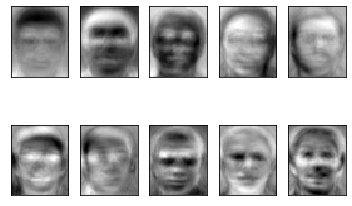

In [8]:
#주성분 벡터 10개를 visualization한다.
eigenFaces = []
# print(eigen_vectors.shape)
# print(eigen_vectors[0].shape)

for i in range(10):
    eigenFace = eigen_vectors[i].reshape([56,46])
    eigenFaces.append(eigenFace)
   
rows = 2
cols = 5
plt.figure()

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(eigenFaces[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

plt.show()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


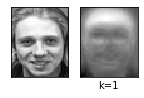

In [9]:
K = [1]

Image = 99

newOrigin = []
faceVector = 0
nO = D2Faces[Image]-D2Faces.mean(axis=0)

for i,k in enumerate(K):
        
        eig_pairs2 = [(eig_vals[i],eig_vecs[:,i]) for i in range(1)]
       
        eig_pairs2.sort(reverse=True)

        eigen_vector_list_k1 = []

        eigen_vector_list_k1.append(eig_pairs[0][1])

        eigen_vectors_k1 = np.array(eigen_vector_list_k1, dtype=float)
        
        weight = nO.dot( eigen_vectors_k1.T).flatten()
        

        faceVector = sum([weight[j]* eigen_vectors_k1[j] for j in range(len( eigen_vectors_k1))])

        newOrigin.append(faceVector)
        

plt.figure()
rows = 1
cols = 5 

ax1 = plt.subplot(rows,cols, 1)
plt.imshow(D2Faces[Image].reshape([56,46]),cmap='gray')
plt.xticks(())
plt.yticks(())
for i,k in enumerate(K) :
        ax2 = plt.subplot(rows,cols, i+2)
        plt.imshow(newOrigin[i].reshape([56,46]),cmap='gray')
        ax2.set_xlabel('k='+str(k))
        plt.xticks(())
        plt.yticks(())

plt.show()


[ 32.07109754  31.69319089  32.15881798 ... -10.11319638 -19.89596242
 -21.59490935]
[120 121 121 ...  83  83  83]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


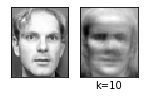

In [10]:
K = [10]

Image = 158

newOrigin = []
faceVector = 0
nO = D2Faces[Image]-D2Faces.mean(axis=0)


NO = np.array(nO, dtype=float)

for i,k in enumerate(K):
        
        eig_pairs2 = [(eig_vals[i],eig_vecs[:,i]) for i in range(10)]
        
        eig_pairs2.sort(reverse=True)

        eigen_vector_list_k10 = []

        for z in range(10):
            eigen_vector_list_k10.append(eig_pairs2[z][1])
        

        eigen_vectors_k10 = np.array(eigen_vector_list_k10, dtype=float)
       
        eigen_k10_T = np.transpose(eigen_vectors_k10)
        
        weight = nO.dot( eigen_k10_T).flatten()
       
        faceVector = sum([weight[j]* eigen_vectors_k10[j] for j in range(len(eigen_vectors_k10))])

        newOrigin.append(faceVector)
print(faceVector)
print(D2Faces[Image])
plt.figure()
rows = 1
cols = 5 

ax1 = plt.subplot(rows,cols, 1)
plt.imshow(D2Faces[Image].reshape([56,46]),cmap='gray')
plt.xticks(())
plt.yticks(())
for i,k in enumerate(K) :
        ax2 = plt.subplot(rows,cols, i+2)
        plt.imshow(newOrigin[0].reshape([56,46]),cmap='gray')
        ax2.set_xlabel('k='+str(k))
        plt.xticks(())
        plt.yticks(())

plt.show()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


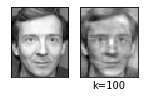

In [11]:
K = [100]

Image = 25

newOrigin = []
faceVector = 0

nO = D2Faces[Image]-D2Faces.mean(axis=0)

NO = np.array(nO, dtype=float)


for i,k in enumerate(K):

        
        eig_pairs2 = [(eig_vals[i],eig_vecs[:,i]) for i in range(100)]
        
        eig_pairs2.sort(reverse=True)

        eigen_vector_list_k100 = []

        for z in range(100):
            eigen_vector_list_k100.append(eig_pairs2[z][1])
        

        eigen_vectors_k100 = np.array(eigen_vector_list_k100, dtype=float)
       
        eigen_k100_T = np.transpose(eigen_vectors_k100)

        weight = nO.dot( eigen_k100_T).flatten()
        
        faceVector = sum([weight[j]* eigen_vectors_k100[j] for j in range(len(eigen_vectors_k100))])

        newOrigin.append(faceVector)

plt.figure()
rows = 1
cols = 5 

ax1 = plt.subplot(rows,cols, 1)
plt.imshow(D2Faces[Image].reshape([56,46]),cmap='gray')
plt.xticks(())
plt.yticks(())
for i,k in enumerate(K) :
        ax2 = plt.subplot(rows,cols, i+2)
        plt.imshow(newOrigin[0].reshape([56,46]),cmap='gray')
        ax2.set_xlabel('k='+str(k))
        plt.xticks(())
        plt.yticks(())

plt.show()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


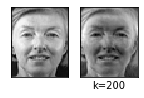

In [12]:
K = [200]

Image = 280

newOrigin = []
faceVector = 0
nO = D2Faces[Image]-D2Faces.mean(axis=0)
NO = np.array(nO, dtype=float)


for i,k in enumerate(K):
        eig_pairs2 = [(eig_vals[i],eig_vecs[:,i]) for i in range(200)]
        
        eig_pairs2.sort(reverse=True)
        
        eigen_vector_list_k200 = []
        
        for z in range(200):
            eigen_vector_list_k200.append(eig_pairs2[z][1]) 
            
        eigen_vectors_k200 = np.array(eigen_vector_list_k200, dtype=float)
        
        eigen_k200_T = np.transpose(eigen_vectors_k200)
        
        weight = nO.dot( eigen_k200_T).flatten()

        faceVector = sum([weight[j]* eigen_vectors_k200[j] for j in range(len(eigen_vectors_k200))])

        newOrigin.append(faceVector)


plt.figure()
rows = 1
cols = 5 
ax1 = plt.subplot(rows,cols, 1)
plt.imshow(D2Faces[Image].reshape([56,46]),cmap='gray')
plt.xticks(())
plt.yticks(())
for i,k in enumerate(K) :
        ax2 = plt.subplot(rows,cols, i+2)
        plt.imshow(newOrigin[0].reshape([56,46]),cmap='gray')
        ax2.set_xlabel('k='+str(k))
        plt.xticks(())
        plt.yticks(())
plt.show()

In [13]:
# 각 사람의 첫번째 이미지들 모으기
index_list = []
for i in range(40):
    index_list.append(i*10)

print(index_list)

data_list = []
for i in range(len(index_list)) :
    data_list.append(D2Face[i*10])

faceList_First = np.array(data_list)
faceList_First

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390]


array([[ 47,  46,  51, ...,  45,  46,  46],
       [ 36,  37,  35, ..., 157,  95,  97],
       [104, 106, 104, ...,  40,  42,  42],
       ...,
       [112, 112, 111, ...,  70,  70,  71],
       [ 84,  84,  84, ..., 140, 139, 135],
       [121, 122, 121, ...,  37,  36,  39]], dtype=uint8)

In [14]:
# 내사진 이미지 불러오기
dirPath2 = "./my_faces"
files2 = os.listdir(dirPath2)
imgList2 = []
pList2 = []
fileName2 = 's'+str(41)+'_'+str(1)+'.png'
img2 = cv2.imread(dirPath2+'/'+fileName2, 0)
img2 = img2.flatten()
pList2.append(img2)
imgList2.append(pList2)

print(imgList2)
    
faceList2 = np.array(imgList2)


D2Face2 = np.reshape(faceList2, (1,2576))


faceList_First = np.concatenate((faceList_First,D2Face2))

faceList_First

[[array([178, 179, 182, ...,  78,  74,  74], dtype=uint8)]]


array([[ 47,  46,  51, ...,  45,  46,  46],
       [ 36,  37,  35, ..., 157,  95,  97],
       [104, 106, 104, ...,  40,  42,  42],
       ...,
       [ 84,  84,  84, ..., 140, 139, 135],
       [121, 122, 121, ...,  37,  36,  39],
       [178, 179, 182, ...,  78,  74,  74]], dtype=uint8)

([], <a list of 0 Text yticklabel objects>)

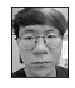

In [15]:
# 불러온 사진 맞는지 확인(1번만 모아놓은 사진에 저장해놓음)
plt.figure()
rows = 1
cols = 5 
ax1 = plt.subplot(rows,cols, 1)
plt.imshow(faceList_First[40].reshape([56,46]),cmap='gray')
plt.xticks(())
plt.yticks(())

In [16]:
# 코사인 유사도 구하는 코드
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


100.00000000000004
110


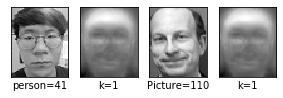

In [17]:
K = [1]
# select 1~40번까지 1번 사진 모음
select = 40

newOrigin = []
newOrigin2 = []

faceVector = 0
faceVector2 = 0

cos_similar1 = []

# k=1에 대한 eigenVector
eig_pairs2 = [(eig_vals[i],eig_vecs[:,i]) for i in range(1)]      
eig_pairs2.sort(reverse=True)
eigen_vector_list_k1 = []
for z in range(1):
    eigen_vector_list_k1.append(eig_pairs2[z][1])             
    eigen_vectors_k1 = np.array(eigen_vector_list_k1, dtype=float)   
    eigen_k1_T = np.transpose(eigen_vectors_k1)
    

for image in range(360) :

    #정규화를 위해 각 벡터에서 평균 벡터를 차감
    nO = D2Faces[image]-D2Faces.mean(axis=0)
    NO = np.array(nO, dtype=float)

    #정규화를 위해 각 벡터에서 평균 벡터를 차감
    n1 = faceList_First[select]-faceList_First.mean(axis=0)
    N1 = np.array(n1, dtype=float)

    #부분공간에 projection
    weight = nO.dot( eigen_k10_T).flatten()
    weight2 = n1.dot( eigen_k10_T).flatten()

    # 360장 중 1장 reconstruction
    faceVector = sum([weight[j]* eigen_vectors_k1[j] for j in range(len(eigen_vectors_k1))])
    # 40명 중 1명 reconstruction
    faceVector2 = sum([weight2[j]* eigen_vectors_k1[j] for j in range(len(eigen_vectors_k1))])
    # 유사도 저장(select한 사람과 360장의 사진에 대하여)
    cos_similar1.append(cos_sim(faceVector,faceVector2))

    
# 유사도 최대값 확인
print(max(cos_similar1)*100)
# 유사도가 가장 큰 사진의 index
print(cos_similar1.index(max(cos_similar1)))
max_index = cos_similar1.index(max(cos_similar1))

#360개의 이미지 중에서 선택한 사람과 가장 유사한 이미지는 max_index번째 있는 이미지이다.(재구성)
nO = D2Faces[max_index]-D2Faces.mean(axis=0)
weight = nO.dot( eigen_k1_T).flatten()
faceVector = sum([weight[j]* eigen_vectors_k1[j] for j in range(len(eigen_vectors_k1))])
newOrigin.append(faceVector)

n1 = faceList_First[select]-faceList_First.mean(axis=0)
weight2 = n1.dot( eigen_k1_T).flatten()
faceVector2 = sum([weight2[j]* eigen_vectors_k1[j] for j in range(len(eigen_vectors_k1))])
newOrigin2.append(faceVector2)


#사진 1 : 40명중 1명(선택한 사람)에 대한 사진 본판
plt.figure()
rows = 1
cols = 5 
ax1 = plt.subplot(rows,cols, 1)
plt.imshow(faceList_First[select].reshape([56,46]),cmap='gray')
ax1.set_xlabel('person='+str(select+1))
plt.xticks(())
plt.yticks(())

for i,k in enumerate(K) :
        #사진 2 : 선택한 사진 k=1로 변환
        ax2 = plt.subplot(rows,cols, i+2)
        plt.imshow(newOrigin2[0].reshape([56,46]),cmap='gray')
        ax2.set_xlabel('k='+str(k))
        plt.xticks(())
        plt.yticks(())

for i,k in enumerate(K) :
        #사진 3 : 360장 중에서 선택한 사진 원본
        ax3 = plt.subplot(rows,cols, i+3)
        plt.imshow(D2Faces[max_index].reshape([56,46]),cmap='gray')
        ax3.set_xlabel('Picture='+str(max_index))
        plt.xticks(())
        plt.yticks(())   
        
for i,k in enumerate(K) :
        #사진 4 : 360장 중에서 가장 유사도가 높은 사진을 k=1로 변환
        ax4 = plt.subplot(rows,cols, i+4)
        plt.imshow(newOrigin[0].reshape([56,46]),cmap='gray')
        ax4.set_xlabel('k='+str(k))
        plt.xticks(())
        plt.yticks(()) 
        

    
plt.show()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


90.67900286595109
51


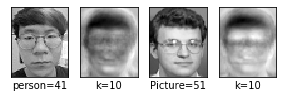

In [18]:
K = [10]
# image (각 사람의 1번 제외한 사진 모음)
# select 1~40번까지 1번 사진 모음
select = 40

newOrigin = []
newOrigin2 = []

faceVector = 0
faceVector2 = 0

cos_similar10 = []

# k=10에 대한 eigenVector
eig_pairs2 = [(eig_vals[i],eig_vecs[:,i]) for i in range(10)]      
eig_pairs2.sort(reverse=True)
eigen_vector_list_k10 = []
for z in range(10):
    eigen_vector_list_k10.append(eig_pairs2[z][1]) 
            
    eigen_vectors_k10 = np.array(eigen_vector_list_k10, dtype=float)
        
    eigen_k10_T = np.transpose(eigen_vectors_k10)
    

for image in range(360) :

    #정규화를 위해 각 벡터에서 평균 벡터를 차감
    nO = D2Faces[image]-D2Faces.mean(axis=0)
    NO = np.array(nO, dtype=float)

    #정규화를 위해 각 벡터에서 평균 벡터를 차감
    n1 = faceList_First[select]-faceList_First.mean(axis=0)
    N1 = np.array(n1, dtype=float)

    #부분공간에 projection
    weight = nO.dot( eigen_k10_T).flatten()
    weight2 = n1.dot( eigen_k10_T).flatten()

    # 360장 중 1장 reconstruction
    faceVector = sum([weight[j]* eigen_vectors_k10[j] for j in range(len(eigen_vectors_k10))])
    # 40명 중 1명 reconstruction
    faceVector2 = sum([weight2[j]* eigen_vectors_k10[j] for j in range(len(eigen_vectors_k10))])
    # 유사도 저장(select한 사람과 360장의 사진에 대하여)
    cos_similar10.append(cos_sim(faceVector,faceVector2))

    
# 유사도 최대값 확인
print(max(cos_similar10)*100)
# 유사도가 가장 큰 사진의 index
print(cos_similar10.index(max(cos_similar10)))
max_index = cos_similar10.index(max(cos_similar10))

#360개의 이미지 중에서 선택한 사람과 가장 유사한 이미지는 max_index번째 있는 이미지이다.
nO = D2Faces[max_index]-D2Faces.mean(axis=0)
weight = nO.dot( eigen_k10_T).flatten()
faceVector = sum([weight[j]* eigen_vectors_k10[j] for j in range(len(eigen_vectors_k10))])
newOrigin.append(faceVector)

n1 = faceList_First[select]-faceList_First.mean(axis=0)
weight2 = n1.dot( eigen_k10_T).flatten()
faceVector2 = sum([weight2[j]* eigen_vectors_k10[j] for j in range(len(eigen_vectors_k10))])
newOrigin2.append(faceVector2)


#사진 1 : 40명중 1명(선택한 사람)에 대한 사진 본판
plt.figure()
rows = 1
cols = 5 
ax1 = plt.subplot(rows,cols, 1)
plt.imshow(faceList_First[select].reshape([56,46]),cmap='gray')
ax1.set_xlabel('person='+str(select+1))
plt.xticks(())
plt.yticks(())

for i,k in enumerate(K) :
        #사진 2 : 선택한 사진 k=1로 변환
        ax2 = plt.subplot(rows,cols, i+2)
        plt.imshow(newOrigin2[0].reshape([56,46]),cmap='gray')
        ax2.set_xlabel('k='+str(k))
        plt.xticks(())
        plt.yticks(())

for i,k in enumerate(K) :
        #사진 3 : 360장 중에서 선택한 사진 원본
        ax3 = plt.subplot(rows,cols, i+3)
        plt.imshow(D2Faces[max_index].reshape([56,46]),cmap='gray')
        ax3.set_xlabel('Picture='+str(max_index))
        plt.xticks(())
        plt.yticks(())   
        
for i,k in enumerate(K) :
        #사진 4 : 360장 중에서 가장 유사도가 높은 사진을 k=1로 변환
        ax4 = plt.subplot(rows,cols, i+4)
        plt.imshow(newOrigin[0].reshape([56,46]),cmap='gray')
        ax4.set_xlabel('k='+str(k))
        plt.xticks(())
        plt.yticks(())        
        
plt.show()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


67.17453332739065
52


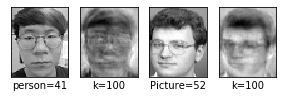

In [19]:
K = [100]
# image (각 사람의 1번 제외한 사진 모음)
# select 1~40번까지 1번 사진 모음
select = 40

newOrigin = []
newOrigin2 = []

faceVector = 0
faceVector2 = 0

cos_similar100 = []

# k=10에 대한 eigenVector
eig_pairs2 = [(eig_vals[i],eig_vecs[:,i]) for i in range(100)]      
eig_pairs2.sort(reverse=True)
eigen_vector_list_k100 = []
for z in range(100):
    eigen_vector_list_k100.append(eig_pairs2[z][1]) 
            
    eigen_vectors_k100 = np.array(eigen_vector_list_k100, dtype=float)
        
    eigen_k100_T = np.transpose(eigen_vectors_k100)
    

for image in range(360) :

    #정규화를 위해 각 벡터에서 평균 벡터를 차감
    nO = D2Faces[image]-D2Faces.mean(axis=0)
    NO = np.array(nO, dtype=float)

    #정규화를 위해 각 벡터에서 평균 벡터를 차감
    n1 = faceList_First[select]-faceList_First.mean(axis=0)
    N1 = np.array(n1, dtype=float)

    #부분공간에 projection
    weight = nO.dot( eigen_k100_T).flatten()
    weight2 = n1.dot( eigen_k100_T).flatten()

    # 360장 중 1장 reconstruction
    faceVector = sum([weight[j]* eigen_vectors_k100[j] for j in range(len(eigen_vectors_k100))])
    # 40명 중 1명 reconstruction
    faceVector2 = sum([weight2[j]* eigen_vectors_k100[j] for j in range(len(eigen_vectors_k100))])
    # 유사도 저장(select한 사람과 360장의 사진에 대하여)
    cos_similar100.append(cos_sim(faceVector,faceVector2))

    
# 유사도 최대값 확인
print(max(cos_similar100)*100)
# 유사도가 가장 큰 사진의 index
print(cos_similar100.index(max(cos_similar100)))
max_index = cos_similar100.index(max(cos_similar100))

#360개의 이미지 중에서 선택한 사람과 가장 유사한 이미지는 max_index번째 있는 이미지이다.
nO = D2Faces[max_index]-D2Faces.mean(axis=0)
weight = nO.dot( eigen_k100_T).flatten()
faceVector = sum([weight[j]* eigen_vectors_k100[j] for j in range(len(eigen_vectors_k100))])
newOrigin.append(faceVector)

n1 = faceList_First[select]-faceList_First.mean(axis=0)
weight2 = n1.dot( eigen_k100_T).flatten()
faceVector2 = sum([weight2[j]* eigen_vectors_k100[j] for j in range(len(eigen_vectors_k100))])
newOrigin2.append(faceVector2)


#사진 1 : 40명중 1명(선택한 사람)에 대한 사진 본판
plt.figure()
rows = 1
cols = 5 
ax1 = plt.subplot(rows,cols, 1)
plt.imshow(faceList_First[select].reshape([56,46]),cmap='gray')
ax1.set_xlabel('person='+str(select+1))
plt.xticks(())
plt.yticks(())

for i,k in enumerate(K) :
        #사진 2 : 선택한 사진 k=1로 변환
        ax2 = plt.subplot(rows,cols, i+2)
        plt.imshow(newOrigin2[0].reshape([56,46]),cmap='gray')
        ax2.set_xlabel('k='+str(k))
        plt.xticks(())
        plt.yticks(())

for i,k in enumerate(K) :
        #사진 3 : 360장 중에서 선택한 사진 원본
        ax3 = plt.subplot(rows,cols, i+3)
        plt.imshow(D2Faces[max_index].reshape([56,46]),cmap='gray')
        ax3.set_xlabel('Picture='+str(max_index))
        plt.xticks(())
        plt.yticks(())   
        
for i,k in enumerate(K) :
        #사진 4 : 360장 중에서 가장 유사도가 높은 사진을 k=1로 변환
        ax4 = plt.subplot(rows,cols, i+4)
        plt.imshow(newOrigin[0].reshape([56,46]),cmap='gray')
        ax4.set_xlabel('k='+str(k))
        plt.xticks(())
        plt.yticks(())           
        
plt.show()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


64.46076356033367
50


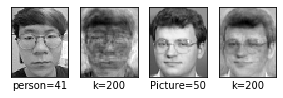

In [20]:
K = [200]
# image (각 사람의 1번 제외한 사진 모음)
# select 1~40번까지 1번 사진 모음
select = 40

newOrigin = []
newOrigin2 = []

faceVector = 0
faceVector2 = 0

cos_similar200 = []

# k=10에 대한 eigenVector
eig_pairs2 = [(eig_vals[i],eig_vecs[:,i]) for i in range(200)]      
eig_pairs2.sort(reverse=True)
eigen_vector_list_k200 = []
for z in range(200):
    eigen_vector_list_k200.append(eig_pairs2[z][1]) 
            
    eigen_vectors_k200 = np.array(eigen_vector_list_k200, dtype=float)
        
    eigen_k200_T = np.transpose(eigen_vectors_k200)
    
for image in range(360) :

    #정규화를 위해 각 벡터에서 평균 벡터를 차감
    nO = D2Faces[image]-D2Faces.mean(axis=0)
    NO = np.array(nO, dtype=float)

    #정규화를 위해 각 벡터에서 평균 벡터를 차감
    n1 = faceList_First[select]-faceList_First.mean(axis=0)
    N1 = np.array(n1, dtype=float)

    #부분공간에 projection
    weight = nO.dot( eigen_k200_T).flatten()
    weight2 = n1.dot( eigen_k200_T).flatten()

    # 360장 중 1장 reconstruction
    faceVector = sum([weight[j]* eigen_vectors_k200[j] for j in range(len(eigen_vectors_k200))])
    # 40명 중 1명 reconstruction
    faceVector2 = sum([weight2[j]* eigen_vectors_k200[j] for j in range(len(eigen_vectors_k200))])
    # 유사도 저장(select한 사람과 360장의 사진에 대하여)
    cos_similar200.append(cos_sim(faceVector,faceVector2))

    
# 유사도 최대값 확인
print(max(cos_similar200)*100)
# 유사도가 가장 큰 사진의 index
print(cos_similar200.index(max(cos_similar200)))
max_index = cos_similar200.index(max(cos_similar200))

#360개의 이미지 중에서 선택한 사람과 가장 유사한 이미지는 max_index번째 있는 이미지이다.
nO = D2Faces[max_index]-D2Faces.mean(axis=0)
weight = nO.dot( eigen_k200_T).flatten()
faceVector = sum([weight[j]* eigen_vectors_k200[j] for j in range(len(eigen_vectors_k200))])
newOrigin.append(faceVector)

n1 = faceList_First[select]-faceList_First.mean(axis=0)
weight2 = n1.dot( eigen_k200_T).flatten()
faceVector2 = sum([weight2[j]* eigen_vectors_k200[j] for j in range(len(eigen_vectors_k200))])
newOrigin2.append(faceVector2)


#사진 1 : 40명중 1명(선택한 사람)에 대한 사진 본판
plt.figure()
rows = 1
cols = 5 
ax1 = plt.subplot(rows,cols, 1)
plt.imshow(faceList_First[select].reshape([56,46]),cmap='gray')
ax1.set_xlabel('person='+str(select+1))
plt.xticks(())
plt.yticks(())

for i,k in enumerate(K) :
        #사진 2 : 선택한 사진 k=1로 변환
        ax2 = plt.subplot(rows,cols, i+2)
        plt.imshow(newOrigin2[0].reshape([56,46]),cmap='gray')
        ax2.set_xlabel('k='+str(k))
        plt.xticks(())
        plt.yticks(())

for i,k in enumerate(K) :
        #사진 3 : 360장 중에서 선택한 사진 원본
        ax3 = plt.subplot(rows,cols, i+3)
        plt.imshow(D2Faces[max_index].reshape([56,46]),cmap='gray')
        ax3.set_xlabel('Picture='+str(max_index))
        plt.xticks(())
        plt.yticks(())   
        
for i,k in enumerate(K) :
        #사진 4 : 360장 중에서 가장 유사도가 높은 사진을 k=1로 변환
        ax4 = plt.subplot(rows,cols, i+4)
        plt.imshow(newOrigin[0].reshape([56,46]),cmap='gray')
        ax4.set_xlabel('k='+str(k))
        plt.xticks(())
        plt.yticks(()) 
plt.show()
